<a href="https://colab.research.google.com/github/SridharSurapaneni07/Group10_AAI500_Project/blob/main/Group10_AAI500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values: 
 Movie                   0
Year                    0
Ratings                 0
Genre                   0
Gross                   0
Budget                  1
Screens                10
Sequel                  0
Sentiment               0
Views                   0
Likes                   0
Dislikes                0
Comments                0
Aggregate Followers    35
dtype: int64
              Year     Ratings       Genre         Gross        Budget  \
count   231.000000  231.000000  231.000000  2.310000e+02  2.310000e+02   
mean   2014.294372    6.441558    5.359307  6.806603e+07  4.783549e+07   
std       0.456750    0.988765    4.141611  8.890289e+07  5.418596e+07   
min    2014.000000    3.100000    1.000000  2.470000e+03  7.000000e+04   
25%    2014.000000    5.800000    1.000000  1.030000e+07  9.000000e+06   
50%    2014.000000    6.500000    3.000000  3.740000e+07  2.800000e+07   
75%    2015.000000    7.100000    8.000000  8.935000e+07  6.500000e+07   
max    2015.0

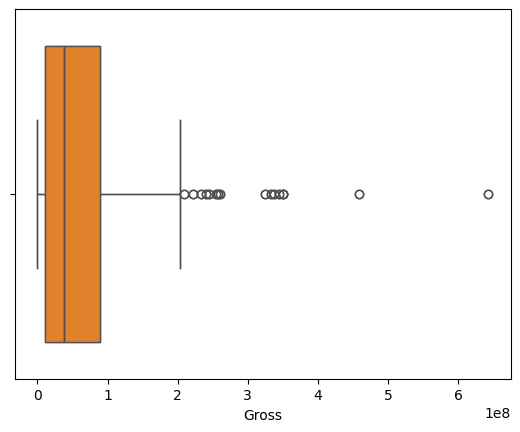

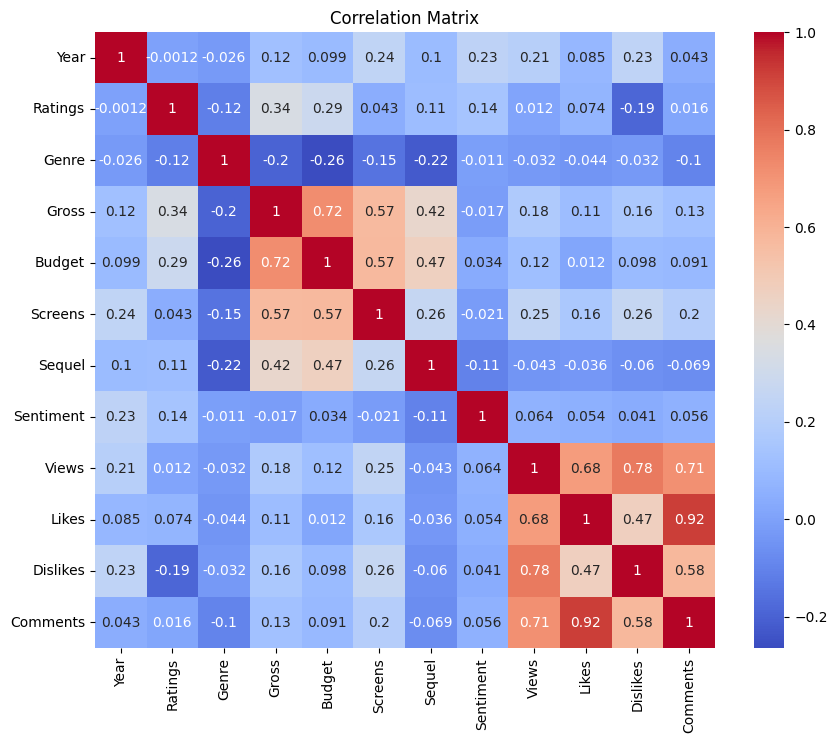

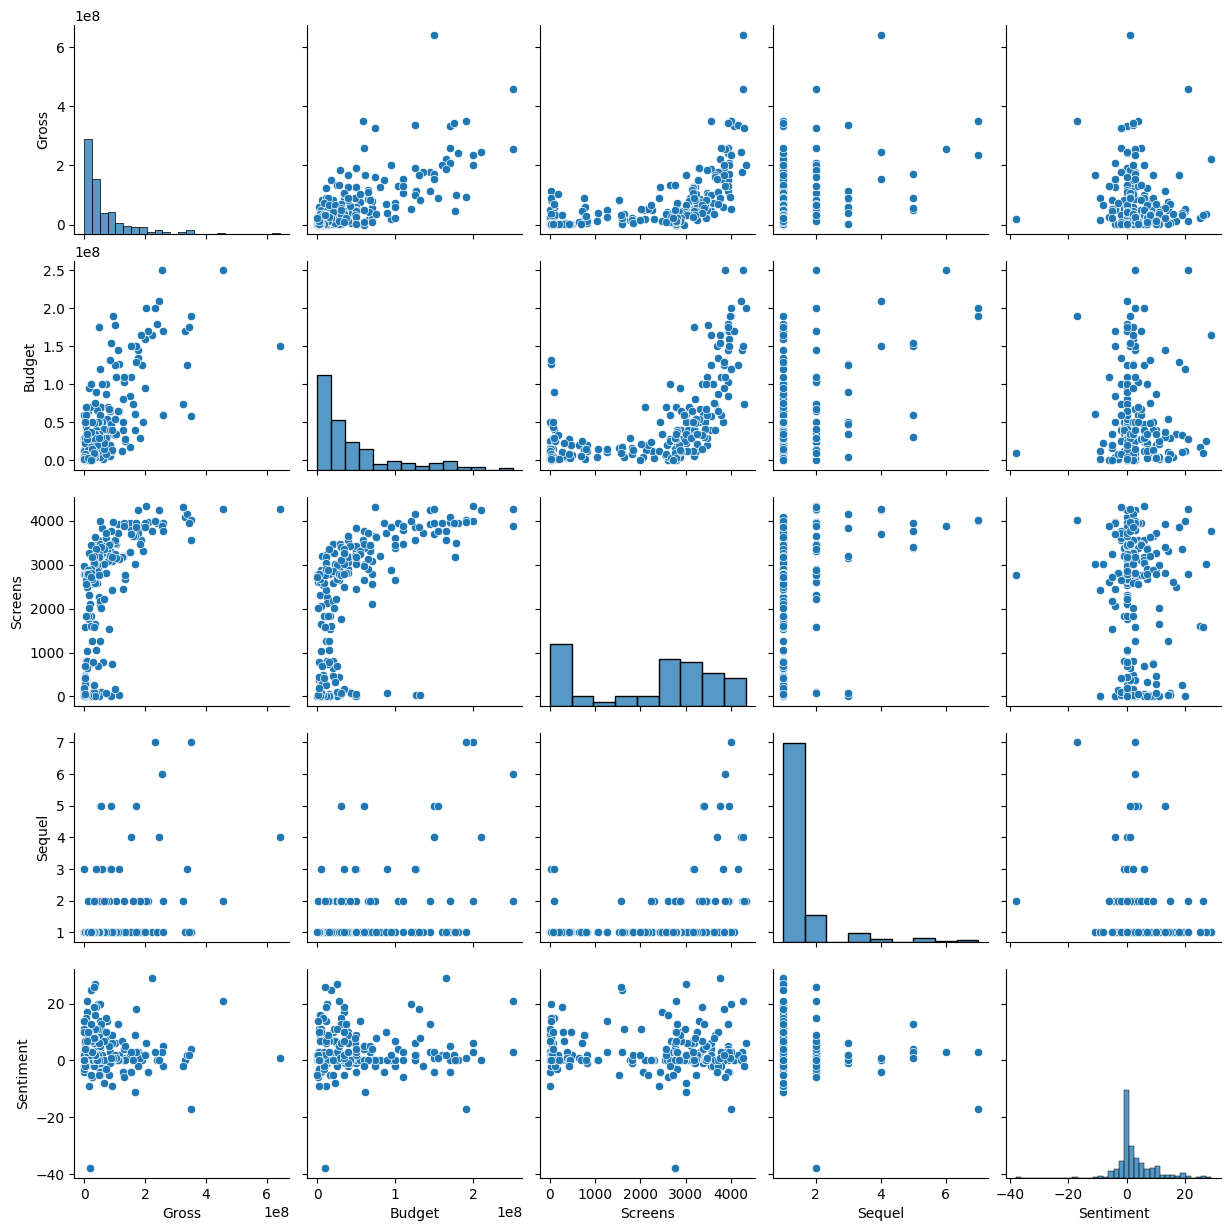

R-squared: 0.5566270837586522
Mean Absolute Error: $33301384


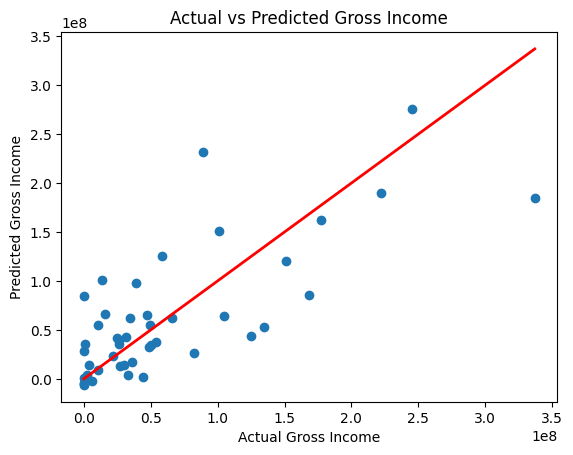

          Coefficient
Budget   8.971483e-01
Screens  1.370747e+04
Sequel   1.290211e+07
Budget and Screens have the strongest impact on predicting gross income, while Sentiment has a smaller effect.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Load the dataset
file_path = 'CSMdataset.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# 1. Data Cleaning/Preparation
# Print missing values
print("Missing values: \n" ,df.isnull().sum())

# Handling missing values
# Use .loc to avoid the FutureWarning
df.loc[:, 'Budget'] = df['Budget'].fillna(df['Budget'].median())  # Use .loc for inplace modification
df.loc[:, 'Screens'] = df['Screens'].fillna(df['Screens'].median()) # Use .loc for inplace modification
df.drop(columns=['Aggregate Followers'], inplace=True)

# Detecting outliers using IQR
Q1 = df[['Gross', 'Budget', 'Likes']].quantile(0.25)
Q3 = df[['Gross', 'Budget', 'Likes']].quantile(0.75)
IQR = Q3 - Q1

# Filtering out rows with extreme outliers
# Select only the relevant columns for comparison
filtered_df = df[['Gross', 'Budget', 'Likes']]
# Use .loc to avoid the ValueError and filter correctly
df_outliers_removed = df[~((filtered_df < (Q1 - 1.5 * IQR)) | (filtered_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualizing outliers with boxplot
import seaborn as sns
sns.boxplot(x=df['Gross'])

# Detecting outliers using IQR
Q1 = df[['Gross', 'Budget', 'Likes']].quantile(0.25)
Q3 = df[['Gross', 'Budget', 'Likes']].quantile(0.75)
IQR = Q3 - Q1

# Filtering out rows with extreme outliers
# Use .loc to avoid the ValueError and filter correctly
df_outliers_removed = df[~((filtered_df < (Q1 - 1.5 * IQR)) | (filtered_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualizing outliers with boxplot
import seaborn as sns
sns.boxplot(x=df['Gross'])

# 2. Exploratory Data Analysis (EDA)

# Basic statistics to understand the data
print(df.describe())

# Correlation matrix
# Select only numeric features for correlation calculation
numeric_df = df.select_dtypes(include=np.number)  # Selects only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')  # Use numeric_df here
plt.title('Correlation Matrix')
plt.show()

# Scatter plots to explore relationships
sns.pairplot(df[['Gross', 'Budget', 'Screens','Sequel','Sentiment']])
plt.show()

# 3. Model Selection - Preparing data for regression
X = df[['Budget', 'Screens', 'Sequel']]  # Predictors
y = df['Gross']  # Target

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Building the Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# 5. Model Analysis - Evaluating the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: ${round(mae)}")

# Visualize actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Diagonal line
plt.title('Actual vs Predicted Gross Income')
plt.xlabel('Actual Gross Income')
plt.ylabel('Predicted Gross Income')
plt.show()

# Display coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Conclusion
print("Budget and Screens have the strongest impact on predicting gross income, while Sentiment has a smaller effect.")